In [1]:
import pandas as pd
import numpy as np

import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap

In [2]:
colors = ['#5F0F40', '#9A031E', '#FB8B24', '#E36414', '#0F4C5C']
custom_colors = ListedColormap(colors)

In [3]:
final_data = pd.read_excel("Data.xlsx", sheet_name="Filtered Data")
final_data.head()

,Title,Subreddit,Date,Body,Comment_1,Comment_2,Comment_3,Comment_4,Comment_5,Comment_6,Comment_7,Comment_8,Comment_9,Comment_10
0,"Var isn’t bad. The implementation of it, is.",PremierLeague,21/09/2019 13:51:37,Var is a system that was brought into the leag...,I agree. Not only is the location of body part...,Completely agree. Kid of reminds me of the “ca...,I think the trouble is is that the “clear and ...,"VAR is a tool, a method, human error will alwa...",I'm happy spuds lost but I couldn't agree more...,Totally agree! What a disaster for not only th...,Whatever happened to ‘daylight’? FFS. You are ...,I don’t understand how the prem is implementin...,I totally agree about the implementation part....,"That being said, they did apply it exactly as ..."
1,The VAR is an absolute disgrace,PremierLeague,08/04/2023 15:44:11,Time and time again does the VAR prove its inc...,Yep. VAR happy to forensically examine multipl...,Brighton got screwed ngl,You are 100% correct,They really need to start giving out a lot mor...,"Not to mention the red card for Stellini, he w...",My issue with what I’ve seen today is that VAR...,"Var is amazing, and should be kept 100% otherw...","VAR decides who goes to europe, absolutely sca...",I've said it b4 and I'll do it again. It's n...,What annoys me. Is we have all the angles and ...
2,The Premier League just admitted that VAR made...,PremierLeague,10/07/2020 09:34:20,They've said that pens shouldn't have been giv...,We need a second VAR system to review the deci...,Pretty hopeless tbh. The problem is on some de...,"Testament to what a great, honest sportsman Ja...",This is actually pointless I’m tired of listen...,Important nuance that needs to be said more in...,Why is everyone calling for he removal of VAR....,It's come to the point now where we might as w...,Villa was looking great before that penalty call.,"Tbh VAR is not the problem, the video referees...",Its genuinely ruining the enjoyment of the spo...
3,"Seriously, what can we do as fans about VAR? B...",PremierLeague,02/09/2023 15:40:00,Seriously wondering what we can do as fans abo...,"Fellow fans, this is a friendly reminder to pl...","Scrap the ""clear and obvious"" nonsense. Entire...",Refs want VAR gone. Only explanation.,"Sack the English VAR and pay italian, german e...",At this point in time I try not to think about...,Demand a no disqualification match with Mike Dean,This is a broader issue than VAR. PL referees...,PGMOL need to start specific VAR programme tra...,"In reality - nothing\n\nThe league is corrupt,...",March down to Stockley Park and protest
4,Would you rather stick with the current VAR or...,football,03/02/2020 08:00:27,"Personally, I'd rather have it with it's defic...",I can't find the article rn but I seem to reme...,VAR should remain as way to guarantee a fair p...,Watching France v England rugby on Sunday - tr...,Referee's need to learn to use it correctly. I...,"Nothing wrong with it, it's the knobs using it...",Or may be use it correctly!? \n \nThe way the...,Make VAR work like in Tennis and problem solve...,What I'm about to say is 100% controversial bu...,"In the premier league at least, I couldn't car...","I would get rid of it, purely because I felt f..."


In [4]:
data_points = final_data.drop(columns=['Subreddit', 'Date'])
data_points.tail()

,Title,Body,Comment_1,Comment_2,Comment_3,Comment_4,Comment_5,Comment_6,Comment_7,Comment_8,Comment_9,Comment_10
58,A Unique Argument About VAR (from an experienc...,NaN,"Response to the article where it says ""is PRO ...",How was this unanticipated?\n\nThis is exactly...,One major assumption of the author's argument ...,What I don't understand about this insight is ...,Clarification/question about VAR logistics:\n\...,This was actually written by my state's SDI (S...,I don't think people realize that if this play...,Its not what im saying. What im saying is that...,This was good. I love cuban-missile-crisis-sty...,"The goal of VAR is to fix clear, obvious error..."
59,‘It’s inexplicable’: We need to talk about VAR,NaN,Yawn ... anyone who expected VAR to be some pa...,I'd like to point out that that AR is in a rea...,"""Fuck VAR""\n-Every Galaxy fan",I would really hate to see a challenge system....,"The more VAR usage I see, the less video revie...",VAR should be used to confirm goals only. Any...,"I’ll just sit here in the corner, not minding ...",What is he saying about the Atlanta goal?? Gei...,Refs aren’t perfect so they can’t always give ...,"Add two more officials, each side has an AR ."
60,Offside model for the Gatt goal - Let's discus...,NaN,"I wish I could discuss VAR, but every time VAR...",This is at the point where you give the Attack...,Just to be clear. I don't object to an offside...,The VAR experience we had on Saturday was the ...,Same thing Petke said at the match after they ...,Yeah. Let's discuss VAR.,So you're saying that the VAR should have the ...,"In realtime, I agree that the forward should g...",The benefit in this case should go to the call...,"I agree, my biggest issue was with the way it ..."
61,[Pay Brennan] That comment from PRO has arrive...,NaN,Full tweet thread:\n\n> That comment from PRO ...,Laughable. Have consistency. There have been p...,1) needs to be a massive campaign towards gett...,Getting the number wrong I think further shows...,"It isn't even that they got the number wrong, ...","Laughable. Thanks for nothing again, PRO. The ...",Bull shit. We’ve all seen closer calls with le...,"Something, something, something, #6’s pony tai...",I actually agree that you can’t tell conclusiv...,"Of course they got the number wrong initially,..."
62,VAR system significantly reducing number of re...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_points_filled = data_points.fillna('')
data_points_filled.tail()

,Title,Body,Comment_1,Comment_2,Comment_3,Comment_4,Comment_5,Comment_6,Comment_7,Comment_8,Comment_9,Comment_10
58,A Unique Argument About VAR (from an experienc...,,"Response to the article where it says ""is PRO ...",How was this unanticipated?\n\nThis is exactly...,One major assumption of the author's argument ...,What I don't understand about this insight is ...,Clarification/question about VAR logistics:\n\...,This was actually written by my state's SDI (S...,I don't think people realize that if this play...,Its not what im saying. What im saying is that...,This was good. I love cuban-missile-crisis-sty...,"The goal of VAR is to fix clear, obvious error..."
59,‘It’s inexplicable’: We need to talk about VAR,,Yawn ... anyone who expected VAR to be some pa...,I'd like to point out that that AR is in a rea...,"""Fuck VAR""\n-Every Galaxy fan",I would really hate to see a challenge system....,"The more VAR usage I see, the less video revie...",VAR should be used to confirm goals only. Any...,"I’ll just sit here in the corner, not minding ...",What is he saying about the Atlanta goal?? Gei...,Refs aren’t perfect so they can’t always give ...,"Add two more officials, each side has an AR ."
60,Offside model for the Gatt goal - Let's discus...,,"I wish I could discuss VAR, but every time VAR...",This is at the point where you give the Attack...,Just to be clear. I don't object to an offside...,The VAR experience we had on Saturday was the ...,Same thing Petke said at the match after they ...,Yeah. Let's discuss VAR.,So you're saying that the VAR should have the ...,"In realtime, I agree that the forward should g...",The benefit in this case should go to the call...,"I agree, my biggest issue was with the way it ..."
61,[Pay Brennan] That comment from PRO has arrive...,,Full tweet thread:\n\n> That comment from PRO ...,Laughable. Have consistency. There have been p...,1) needs to be a massive campaign towards gett...,Getting the number wrong I think further shows...,"It isn't even that they got the number wrong, ...","Laughable. Thanks for nothing again, PRO. The ...",Bull shit. We’ve all seen closer calls with le...,"Something, something, something, #6’s pony tai...",I actually agree that you can’t tell conclusiv...,"Of course they got the number wrong initially,..."
62,VAR system significantly reducing number of re...,,,,,,,,,,,


In [6]:
analyzer = SentimentIntensityAnalyzer()

In [7]:
neg = []
pos = []
neu = []
compound = []
for col in data_points_filled.columns:
    s1 = []
    s2 = []
    s3 = []
    s4 = []
    temp_list = data_points_filled[col]
    for t in temp_list:
        scores = analyzer.polarity_scores(t)
        s1.append(scores['neg'])
        s2.append(scores['pos'])
        s3.append(scores['neu'])
        s4.append(scores['compound'])
    neg.append(s1)
    pos.append(s2)
    neu.append(s3)
    compound.append(s4)

In [8]:
neg_data = pd.DataFrame(neg).T
neg_data.columns = ["Title", "Body", "Comment_1", "Comment_2", "Comment_3", "Comment_4", "Comment_5", "Comment_6", "Comment_7", "Comment_8", "Comment_9", "Comment_10"]

pos_data = pd.DataFrame(pos).T
pos_data.columns = ["Title", "Body", "Comment_1", "Comment_2", "Comment_3", "Comment_4", "Comment_5", "Comment_6", "Comment_7", "Comment_8", "Comment_9", "Comment_10"]

neu_data = pd.DataFrame(neu).T
neu_data.columns = ["Title", "Body", "Comment_1", "Comment_2", "Comment_3", "Comment_4", "Comment_5", "Comment_6", "Comment_7", "Comment_8", "Comment_9", "Comment_10"]

compound_data = pd.DataFrame(compound).T
compound_data.columns = ["Title", "Body", "Comment_1", "Comment_2", "Comment_3", "Comment_4", "Comment_5", "Comment_6", "Comment_7", "Comment_8", "Comment_9", "Comment_10"]

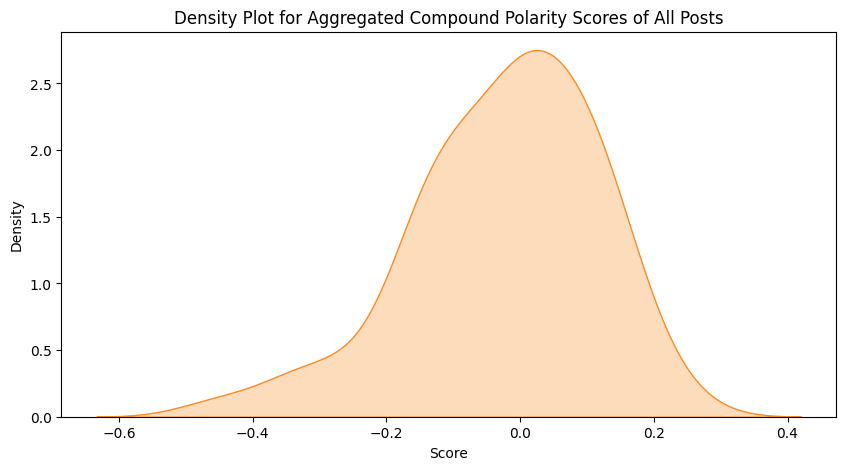

In [9]:
mean_compound_sentiment = list(compound_data.sum(axis=1).apply(lambda x: round(x/12, 4)))

plt.figure(figsize=(10, 5))
sns.kdeplot(mean_compound_sentiment, color=colors[2], fill=True, alpha=0.3)
plt.title("Density Plot for Aggregated Compound Polarity Scores of All Posts")
plt.xlabel("Score")
plt.ylabel("Density")
plt.show()

In [10]:
subreddit_list = list(final_data['Subreddit'])
subreddit_data = pd.DataFrame([subreddit_list, mean_compound_sentiment]).T
subreddit_data.columns = ['Subreddit', 'Average Compound Score']
subreddit_data = subreddit_data.groupby('Subreddit')['Average Compound Score'].agg(['mean']).reset_index().rename(columns={'mean': 'Average Compound Score'})
subreddit_data.head()

,Subreddit,Average Compound Score
0,LaLiga,-0.022800
1,MLS,-0.002744
2,PremierLeague,-0.101195
3,football,0.018311
4,soccer,0.015875


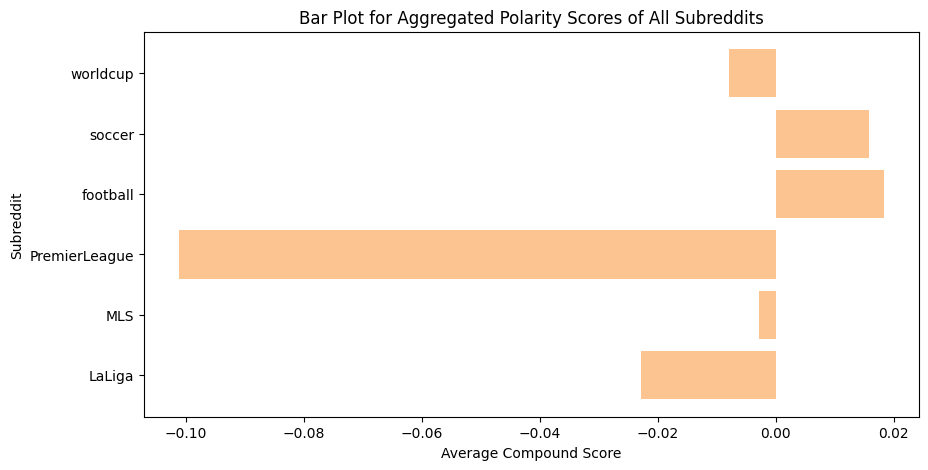

In [42]:
plt.figure(figsize=(10, 5))
plt.barh(subreddit_data['Subreddit'], subreddit_data['Average Compound Score'], color=colors[2], alpha=0.5)
plt.title("Bar Plot for Aggregated Polarity Scores of All Subreddits")
plt.xlabel("Average Compound Score")
plt.ylabel("Subreddit")
plt.show()

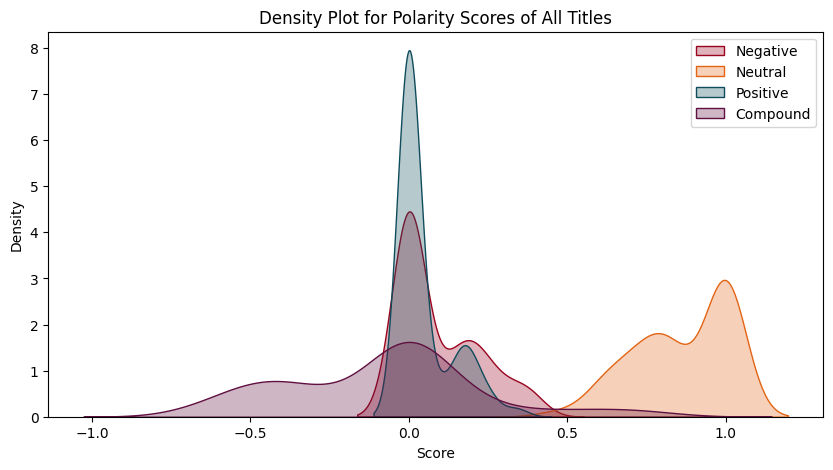

In [44]:
plt.figure(figsize=(10, 5))
sns.kdeplot(neg_data['Title'], color=colors[1], fill=True, alpha=0.3, label="Negative")
sns.kdeplot(neu_data['Title'], color=colors[3], fill=True, alpha=0.3, label="Neutral")
sns.kdeplot(pos_data['Title'], color=colors[4], fill=True, alpha=0.3, label="Positive")
sns.kdeplot(compound_data['Title'], color=colors[0], fill=True, alpha=0.3, label="Compound")
plt.legend()
plt.title("Density Plot for Polarity Scores of All Titles")
plt.xlabel("Score")
plt.ylabel("Density")
plt.show()

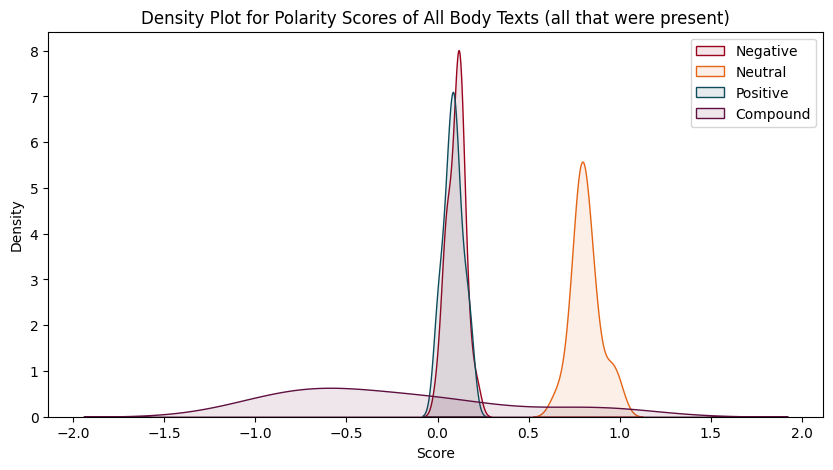

In [12]:
plt.figure(figsize=(10, 5))
sns.kdeplot(neg_data['Body'][:24], color=colors[1], fill=True, alpha=0.1, label="Negative")
sns.kdeplot(neu_data['Body'][:24], color=colors[3], fill=True, alpha=0.1, label="Neutral")
sns.kdeplot(pos_data['Body'][:24], color=colors[4], fill=True, alpha=0.1, label="Positive")
sns.kdeplot(compound_data['Body'][:24], color=colors[0], fill=True, alpha=0.1, label="Compound")
plt.legend()
plt.title("Density Plot for Polarity Scores of All Body Texts (all that were present)")
plt.xlabel("Score")
plt.ylabel("Density")
plt.show()

In [13]:
comments_neg = neg_data.drop(columns=['Title', 'Body'])
mean_neg_comments = list(comments_neg.sum(axis=1).apply(lambda x: round(x/10, 4)))

comments_pos = pos_data.drop(columns=['Title', 'Body'])
mean_pos_comments = list(comments_pos.sum(axis=1).apply(lambda x: round(x/10, 4)))

comments_neu = neu_data.drop(columns=['Title', 'Body'])
mean_neu_comments = list(comments_neu.sum(axis=1).apply(lambda x: round(x/10, 4)))

comments_compound = compound_data.drop(columns=['Title', 'Body'])
mean_compound_comments = list(comments_compound.sum(axis=1).apply(lambda x: round(x/10, 4)))

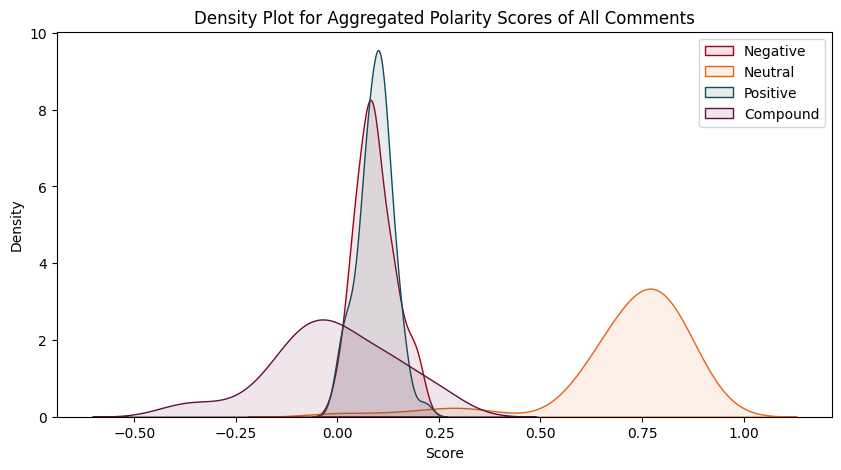

In [14]:
plt.figure(figsize=(10, 5))
sns.kdeplot(mean_neg_comments, color=colors[1], fill=True, alpha=0.1, label="Negative")
sns.kdeplot(mean_neu_comments, color=colors[3], fill=True, alpha=0.1, label="Neutral")
sns.kdeplot(mean_pos_comments, color=colors[4], fill=True, alpha=0.1, label="Positive")
sns.kdeplot(mean_compound_comments, color=colors[0], fill=True, alpha=0.1, label="Compound")
plt.legend()
plt.title("Density Plot for Aggregated Polarity Scores of All Comments")
plt.xlabel("Score")
plt.ylabel("Density")
plt.show()

In [15]:
title_counts = {
    "Missing": 0,
    "Highly Negative": 0,
    "Slightly Negative": 0,
    "Neutral": 0,
    "Slightly Positive": 0,
    "Highly Positive": 0
}

title_neg_words = {}
title_pos_words = {}

for t in list(data_points_filled['Title']):
    if len(t) == 0:
        title_counts["Missing"] += 1
    else:
        title_score = analyzer.polarity_scores(t)['compound']
        if (title_score < -0.4):
            title_counts["Highly Negative"] += 1
        elif (title_score >= -0.4) & (title_score < -0.1):
            title_counts["Slightly Negative"] += 1
        elif (title_score >= -0.1) & (title_score <= 0.1):
            title_counts["Neutral"] += 1
        elif (title_score >= 0.1) & (title_score <= 0.4):
            title_counts["Slightly Positive"] += 1
        elif (title_score > 0.4):
            title_counts["Highly Positive"] += 1
    words = nltk.word_tokenize(t)
    for w in words:
        if analyzer.polarity_scores(w)['compound'] < 0:
            if str.upper(w) not in list(title_neg_words.keys()):
                title_neg_words[str.upper(w)] = abs(analyzer.polarity_scores(w)['compound'])
        if analyzer.polarity_scores(w)['compound'] > 0:
            if str.upper(w) not in list(title_pos_words.keys()):
                title_pos_words[str.upper(w)] = analyzer.polarity_scores(w)['compound']


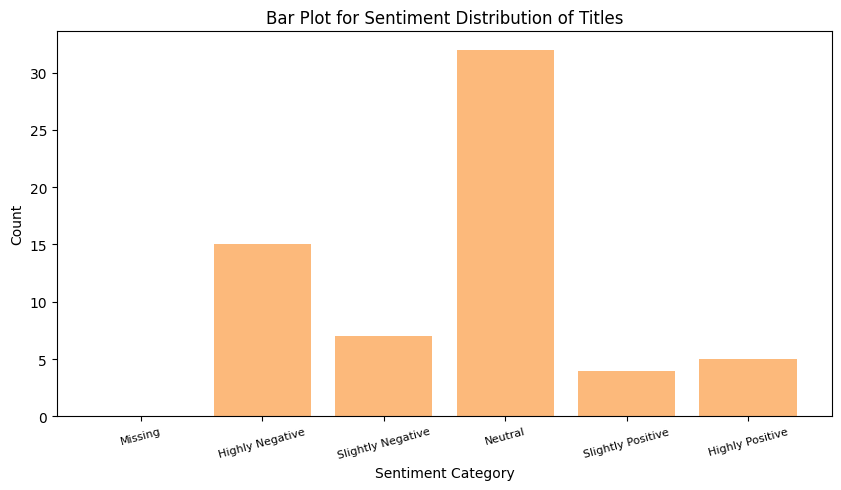

In [16]:
plt.figure(figsize=(10, 5))
plt.bar(title_counts.keys(), title_counts.values(), color=colors[2], alpha=0.6)
plt.xticks(rotation=15, fontsize=8)
plt.title("Bar Plot for Sentiment Distribution of Titles")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

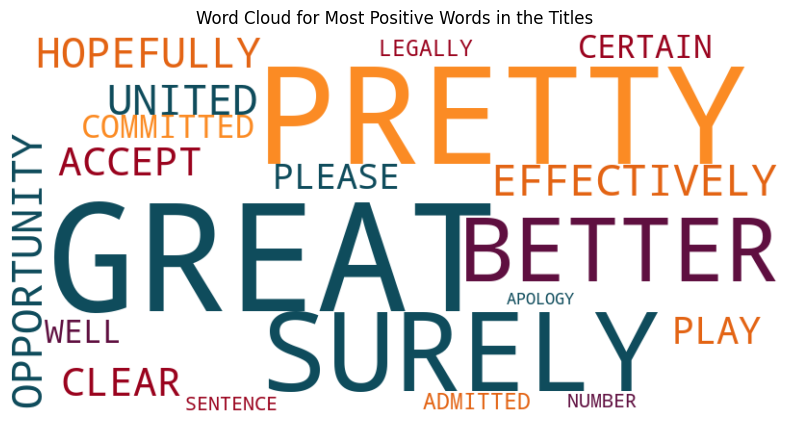

In [17]:
pos_title_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=custom_colors)
pos_title_wordcloud.generate_from_frequencies(title_pos_words)
plt.figure(figsize=(10, 5))
plt.imshow(pos_title_wordcloud, interpolation='bilinear')
plt.title("Word Cloud for Most Positive Words in the Titles")
plt.axis('off')
plt.show()

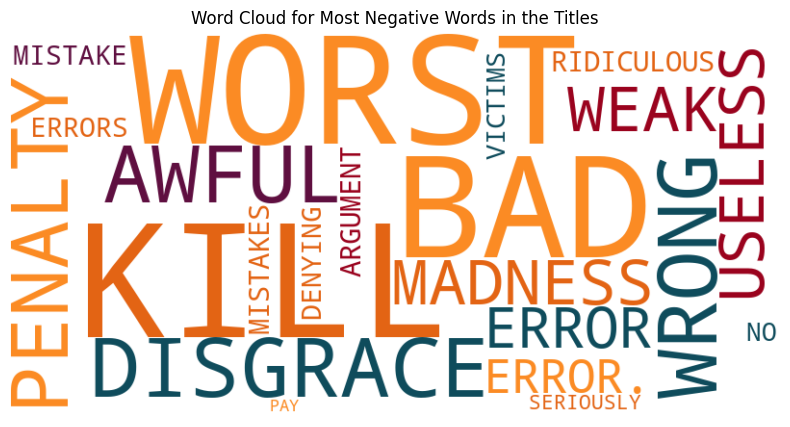

In [18]:
neg_title_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=custom_colors)
neg_title_wordcloud.generate_from_frequencies(title_neg_words)
plt.figure(figsize=(10, 5))
plt.imshow(neg_title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Most Negative Words in the Titles")
plt.show()

In [19]:
body_counts = {
    "Missing": 0,
    "Highly Negative": 0,
    "Slightly Negative": 0,
    "Neutral": 0,
    "Slightly Positive": 0,
    "Highly Positive": 0
}

body_neg_words = {}
body_pos_words = {}

for b in list(data_points_filled['Body']):
    if len(b) == 0:
        body_counts["Missing"] += 1
    else:
        body_score = analyzer.polarity_scores(b)['compound']
        if (body_score < -0.4):
            body_counts["Highly Negative"] += 1
        elif (body_score >= -0.4) & (body_score < -0.1):
            body_counts["Slightly Negative"] += 1
        elif (body_score >= -0.1) & (body_score <= 0.1):
            body_counts["Neutral"] += 1
        elif (body_score >= 0.1) & (body_score <= 0.4):
            body_counts["Slightly Positive"] += 1
        elif (body_score > 0.4):
            body_counts["Highly Positive"] += 1
    words = nltk.word_tokenize(b)
    for w in words:
        if analyzer.polarity_scores(w)['compound'] < 0:
            if str.upper(w) not in list(body_neg_words.keys()):
                body_neg_words[str.upper(w)] = abs(analyzer.polarity_scores(w)['compound'])
        if analyzer.polarity_scores(w)['compound'] > 0:
            if str.upper(w) not in list(body_pos_words.keys()):
                body_pos_words[str.upper(w)] = analyzer.polarity_scores(w)['compound']


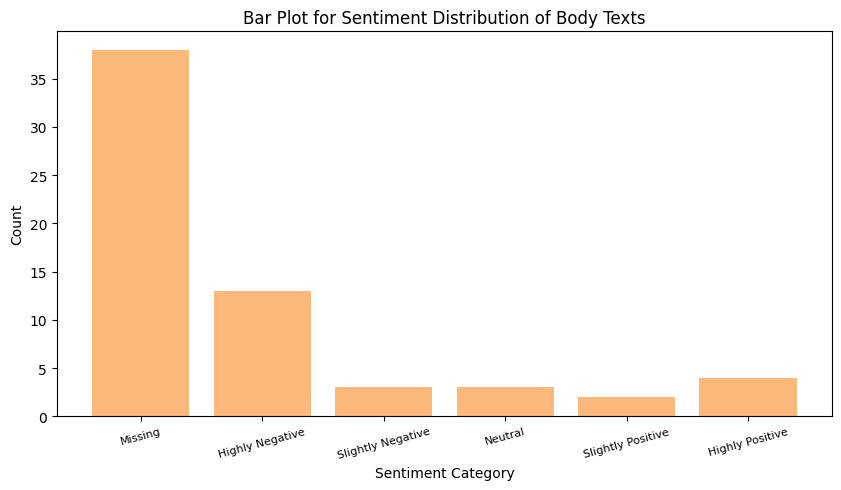

In [20]:
plt.figure(figsize=(10, 5))
plt.bar(body_counts.keys(), body_counts.values(), color=colors[2], alpha=0.6)
plt.xticks(rotation=15, fontsize=8)
plt.title("Bar Plot for Sentiment Distribution of Body Texts")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

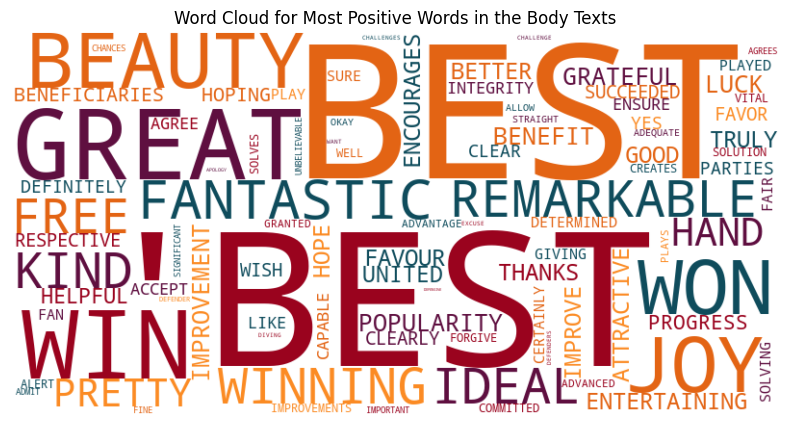

In [21]:
pos_body_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=custom_colors)
pos_body_wordcloud.generate_from_frequencies(body_pos_words)
plt.figure(figsize=(10, 5))
plt.imshow(pos_body_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Most Positive Words in the Body Texts")
plt.show()

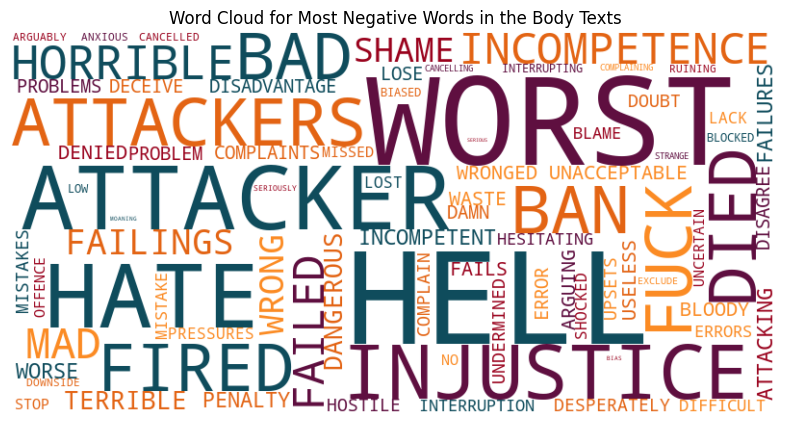

In [22]:
neg_body_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=custom_colors)
neg_body_wordcloud.generate_from_frequencies(body_neg_words)
plt.figure(figsize=(10, 5))
plt.imshow(neg_body_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Most Negative Words in the Body Texts")
plt.show()

In [23]:
comments_data = data_points_filled.drop(columns=['Title', 'Body'])

comments_counts = {
    "Missing": 0,
    "Highly Negative": 0,
    "Slightly Negative": 0,
    "Neutral": 0,
    "Slightly Positive": 0,
    "Highly Positive": 0
}

comments_neg_words = {}
comments_pos_words = {}

for comment in list(comments_data.columns):
    for c in comments_data[comment]:
        if len(c) == 0:
            comments_counts["Missing"] += 1
        else:
            comment_score = analyzer.polarity_scores(c)['compound']
            if (comment_score < -0.4):
                comments_counts["Highly Negative"] += 1
            elif (comment_score >= -0.4) & (comment_score < -0.1):
                comments_counts["Slightly Negative"] += 1
            elif (comment_score >= -0.1) & (comment_score <= 0.1):
                comments_counts["Neutral"] += 1
            elif (comment_score >= 0.1  ) & (comment_score <= 0.4):
                comments_counts["Slightly Positive"] += 1
            elif (comment_score > 0.4):
                comments_counts["Highly Positive"] += 1
        words = nltk.word_tokenize(c)
        for w in words:
            if analyzer.polarity_scores(w)['compound'] < 0:
                if str.upper(w) not in list(comments_neg_words.keys()):
                    comments_neg_words[str.upper(w)] = abs(analyzer.polarity_scores(w)['compound'])
            if analyzer.polarity_scores(w)['compound'] > 0:
                if str.upper(w) not in list(comments_pos_words.keys()):
                    comments_pos_words[str.upper(w)] = analyzer.polarity_scores(w)['compound']

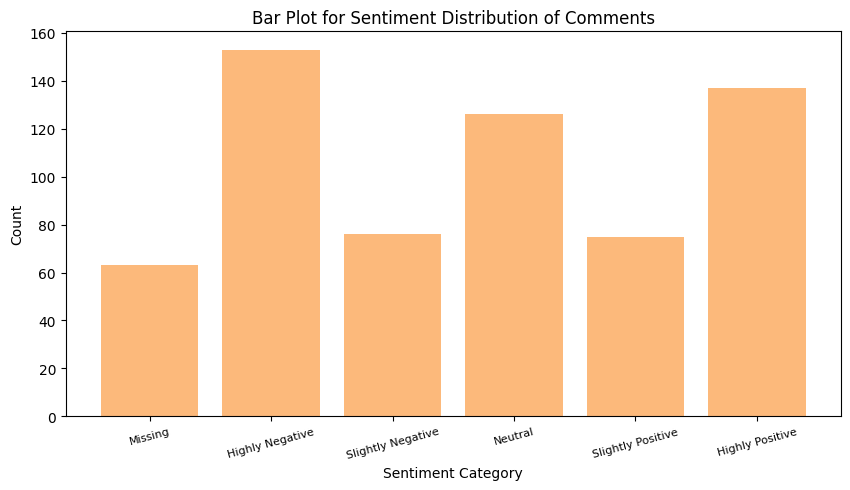

In [24]:
plt.figure(figsize=(10, 5))
plt.bar(comments_counts.keys(), comments_counts.values(), color=colors[2], alpha=0.6)
plt.xticks(rotation=15, fontsize=8)
plt.title("Bar Plot for Sentiment Distribution of Comments")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

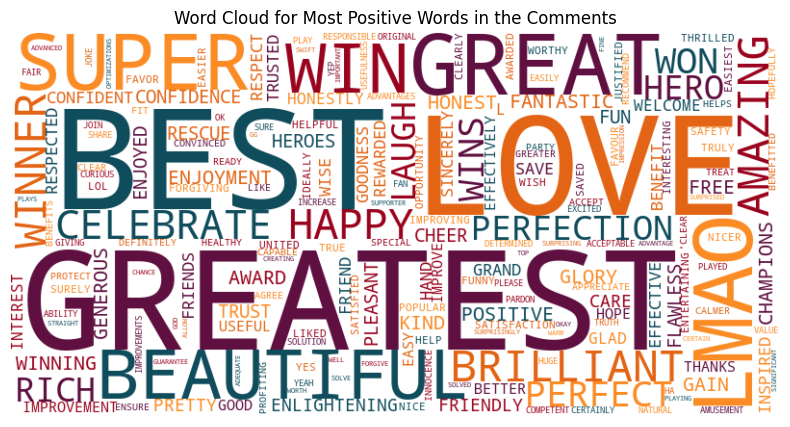

In [25]:
pos_comments_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=custom_colors)
pos_comments_wordcloud.generate_from_frequencies(comments_pos_words)
plt.figure(figsize=(10, 5))
plt.imshow(pos_comments_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Most Positive Words in the Comments")
plt.show()

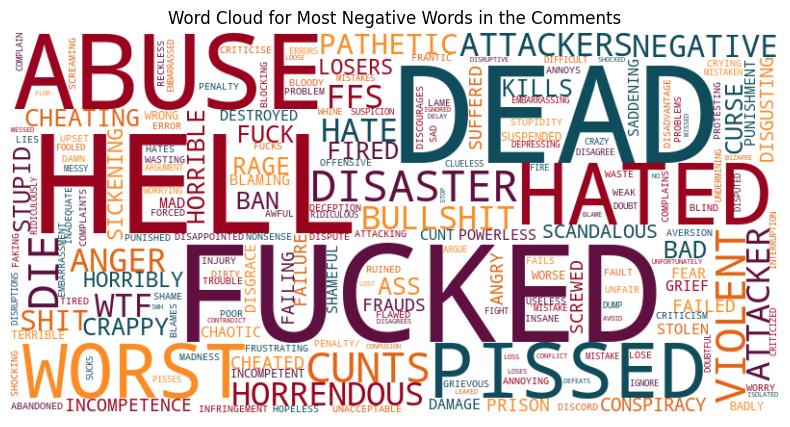

In [26]:
neg_comments_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=custom_colors)
neg_comments_wordcloud.generate_from_frequencies(comments_neg_words)
plt.figure(figsize=(10, 5))
plt.imshow(neg_comments_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Most Negative Words in the Comments")
plt.show()

In [27]:
final_data['Date'] = pd.to_datetime(final_data['Date'])
dates = list(final_data['Date'])
title_polarity = list(compound_data['Title'])
body_polarity = list(compound_data['Body'])
comments_polarity = mean_compound_comments
date_data = pd.DataFrame([dates, title_polarity, body_polarity, comments_polarity]).T
date_data.columns = ["Date", "Title", "Body", "Comments"]
date_data.head()

,Date,Title,Body,Comments
0,2019-09-21 13:51:37,-0.5423,0.0462,0.0418
1,2023-08-04 15:44:11,-0.4939,-0.9286,-0.4001
2,2020-10-07 09:34:20,-0.25,-0.6486,-0.0982
3,2023-02-09 15:40:00,-0.4939,-0.535,-0.0751
4,2020-03-02 08:00:27,0.0,0.9363,-0.0089


In [28]:
date_data.sort_values(by='Date', inplace=True)
date_data.head()

,Date,Title,Body,Comments
58,2017-07-08 15:19:36,-0.3612,0.0,0.2305
60,2017-08-28 17:29:45,0.0,0.0,0.2028
20,2018-04-08 09:50:12,0.0,-0.9738,0.2577
45,2018-06-13 08:44:06,0.0,0.0,-0.0719
52,2018-06-22 20:20:27,-0.4588,0.0,-0.1068


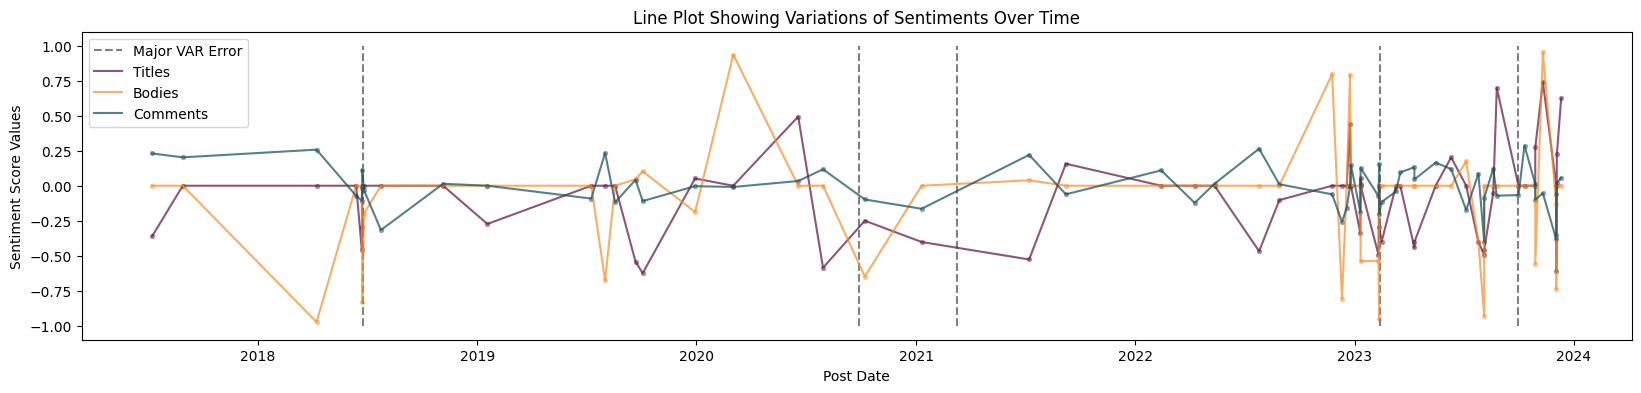

In [29]:
plt.figure(figsize=(20, 4))
plt.vlines(x=[pd.Timestamp('2018-06-25 12:00:00')], ymin=-1, ymax=1, color='gray', linestyle='--', label="Major VAR Error")
plt.vlines(x=[pd.Timestamp('2023-02-11 12:00:00')], ymin=-1, ymax=1, color='gray', linestyle='--')
plt.vlines(x=[pd.Timestamp('2021-03-10 12:00:00')], ymin=-1, ymax=1, color='gray', linestyle='--')
plt.vlines(x=[pd.Timestamp('2020-09-27 12:00:00')], ymin=-1, ymax=1, color='gray', linestyle='--')
plt.vlines(x=[pd.Timestamp('2023-09-30 12:00:00')], ymin=-1, ymax=1, color='gray', linestyle='--')
plt.plot(date_data['Date'], date_data['Title'], color=colors[0], alpha=0.7, label="Titles")
plt.plot(date_data['Date'], date_data['Body'], color=colors[2], alpha=0.7, label="Bodies")
plt.plot(date_data['Date'], date_data['Comments'], color=colors[4], alpha=0.7, label="Comments")
plt.scatter(date_data['Date'], date_data['Title'], color=colors[0], s=8, alpha=0.4)
plt.scatter(date_data['Date'], date_data['Body'], color=colors[2], s=8, alpha=0.4)
plt.scatter(date_data['Date'], date_data['Comments'], color=colors[4], s=8, alpha=0.4)
plt.legend()
plt.title("Line Plot Showing Variations of Sentiments Over Time")
plt.xlabel("Post Date")
plt.ylabel("Sentiment Score Values")
plt.show()